# **Deep Learning-Based Segmentation for Neuronal Cell Detection in Fluorescent Microscopy Images**
### Gabriele Pascali, Gonçalo Araújo, João Galvão

---
# Image Segmentation

## 1. What is Image Segmentation?

Image segmentation is a fundamental technique in computer vision and digital image processing that partitions an image into distinct regions based on pixel characteristics such as color, texture, or intensity. Unlike image classification, which assigns a single label to an entire image, segmentation combines classification and localization by identifying not only what is present but also where it appears—outlining object boundaries at the pixel level.

This process is essential for tasks that require detailed understanding of visual content, including:

- Object detection: Identifying and classifying objects within specific regions.
- Region identification: Differentiating areas based on visual features.  
- Advanced image processing: Supporting applications such as medical imaging, autonomous vehicles, and scene understanding.

Segmentation typically begins by converting an image into a set of labeled regions or a segmentation mask. Techniques often rely on detecting abrupt changes in pixel values (edges), which mark boundaries between different regions. By isolating relevant segments, image segmentation enables more efficient and targeted processing, making it a cornerstone of modern visual data interpretation.

![title](image2.jpeg)


---

## 2. Traditional vs. Deep Learning-Based Segmentation

### 🔹 Traditional Methods

Classical segmentation methods rely on basic pixel-level features such as:

- Color
- Brightness
- Contrast
- Intensity

These approaches are **computationally efficient**, require minimal training, and are well-suited for simpler tasks like basic semantic classification.

**Common classical techniques:**

- Thresholding: One of the simplest techniques, where pixels are divided into regions based on a predefined intensity threshold.
  
- Histograms: Analyze the distribution of pixel values to identify clusters (e.g., peaks and valleys), using features like color or intensity. Efficient due to requiring only a single pass through the image.

- Edge detection: Uses filters (e.g., Sobel, Canny) to detect sharp changes in intensity, highlighting object boundaries by computing image gradients along the x and y axes.

- Watershed algorithms: Treats the image as a topographic surface, "flooding" it from minima to form catchment basins, effectively segmenting based on gradient and topology.

- Region-based segmentation: Starts with seed pixels and grows regions by merging adjacent pixels with similar properties.

- Clustering methods: Group pixels into clusters based on similarity in features such as color, intensity, or texture (e.g., k-means, mean-shift).

### 🔹 Deep Learning-Based Methods

Deep learning–based segmentation leverages neural networks—particularly convolutional neural networks (CNNs)—to automatically identify and delineate objects or regions within images. These models learn complex, hierarchical features from large annotated datasets, allowing for highly precise and context-aware segmentation. Applications span diverse domains, including medical imaging, autonomous driving, and remote sensing. Most segmentation networks output a multi-channel (n-channel) binary format, also referred to as a 2D one-hot encoded mask, where each channel corresponds to a specific class.

Segmentation networks typically follow an encoder-decoder architecture:

- The encoder extracts feature representations through convolution and downsampling.

- A bottleneck compresses this representation.

- The decoder reconstructs the spatial structure via upsampling, producing the segmentation mask.

Most segmentation networks output a multi-channel (n-channel) binary format, also referred to as a 2D one-hot encoded mask, where each channel corresponds to a specific class.


### Popular deep learning segmentation models:

- **Fully Convolutional Networks (FCNs)**  
  Pioneered the use of convolutional layers for segmentation without fully connected layers. The decoder upsamples the encoded features to generate pixel-wise predictions.

- **U-Net**  
  Designed for biomedical image segmentation, U-Net added skip connections, which pass feature maps directly from encoder layers to corresponding decoder layers. This mitigates information loss during downsampling and enables more accurate boundary localization.

- **SegNet**
    Introduced a structured encoder-decoder network using pooling indices to guide upsampling, helping retain spatial precision in segmentation masks.

- **Deeplab**  
  Achieved state-of-the-art performance using atrous (dilated) convolutions to expand the receptive field without increasing computation. Its Atrous Spatial Pyramid Pooling (ASPP) captures multi-scale context, enabling robust segmentation across object sizes.

- **Mask R-CNN**  
  Extends Faster R-CNN for instance segmentation by adding a parallel branch to predict segmentation masks alongside object detection.

- **CenterMask2**
  Builds on Mask R-CNN and combines instance segmentation with real-time object detection, introducing a spatial attention-guided mask head for better mask quality with efficient inference

- **Detectron2**
  A modular, flexible PyTorch-based framework developed by Facebook AI Research. It supports various state-of-the-art segmentation models (including Mask R-CNN and CenterMask2) and offers easy extensibility for custom segmentation pipelines.

- **Vision Transformers (ViT)**  
  Replace convolution with self-attention mechanisms to model long-range dependencies. ViT-based segmentation models (e.g., Segmenter, SETR) achieve strong performance by capturing global context more effectively.


### Common Loss Functions in Image Segmentation

Loss functions play a crucial role in training segmentation networks by quantifying the difference between predicted masks and ground truth labels. The choice of loss function affects convergence, class balance, and the final segmentation quality. Below are some of the most widely used loss functions in image segmentation tasks:

---

#### **1. Binary Cross-Entropy (BCE) Loss**

Used in binary (foreground/background) segmentation tasks.

$$
\mathcal{L}_{\text{BCE}} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)\right]
$$

**Where:**

<ul>
  <li>\( y_i \): Ground truth label (0 or 1)</li>
  <li>\( \hat{y}_i \): Predicted probability</li>
  <li>\( N \): Number of pixels</li>
</ul>  

#### **2. Categorical Cross-Entropy (CCE) Loss**
Used in multi-class segmentation, where each pixel belongs to one of multiple classes.

$$
\mathcal{L}_{\text{CCE}} = -\sum_{i=1}^{N} \sum_{c=1}^{C} y_{i,c} \cdot \log(\hat{y}_{i,c})
$$

**Where:**

<ul>
  <li>\( y_{i,c} \): One-hot encoded true label for class \( c \)</li>
  <li>\( \hat{y}_{i,c} \): Predicted probability for class \( c \)</li>
  <li>\( C \): Number of classes</li>
</ul>


#### **3. Dice Loss**
Measures overlap between predicted and ground truth masks, often used in medical imaging.

$$
\mathcal{L}_{\text{Dice}} = 1 - \frac{2 \sum_i y_i \hat{y}_i + \epsilon}{\sum_i y_i + \sum_i \hat{y}_i + \epsilon}
$$

**Where:**

<ul>
  <li>\( \epsilon \): Smoothing constant (to avoid division by zero)</li>
</ul>


#### **4. Jaccard Loss (IoU Loss)**
Related to Dice Loss, but penalizes false positives more heavily.

$$
\mathcal{L}_{\text{IoU}} = 1 - \frac{\sum_i y_i \hat{y}_i}{\sum_i y_i + \sum_i \hat{y}_i - \sum_i y_i \hat{y}_i}
$$


#### **5. Focal Loss**
Designed to handle class imbalance by focusing training on hard-to-classify examples.

$$
\mathcal{L}_{\text{Focal}} = -\alpha (1 - \hat{y}_i)^{\gamma} y_i \log(\hat{y}_i)
$$

**Where:**  
<ul>
  <li>\( \alpha \): Balancing factor</li>
  <li>\( \gamma \): Focusing parameter (e.g., 2.0)</li>
</ul>


#### **6. Tversky Loss**
Generalizes Dice Loss by weighting false positives and false negatives differently.

$$
\mathcal{L}_{\text{Tversky}} = 1 - \frac{\sum_i y_i \hat{y}_i + \epsilon}{\sum_i y_i \hat{y}_i + \alpha \sum_i y_i (1 - \hat{y}_i) + \beta \sum_i (1 - y_i) \hat{y}_i + \epsilon}
$$

**Where:**

<ul>
  <li>\( \alpha, \beta \): Control the penalty for FN and FP</li>
  <li>\( \epsilon \): Smoothing constant</li>
</ul>

#### **7. Combo Loss**
Combines multiple losses (e.g., BCE + Dice) to leverage their strengths.

$$
\mathcal{L}_{\text{Combo}} = \lambda \cdot \mathcal{L}_{\text{BCE}} + (1 - \lambda) \cdot \mathcal{L}_{\text{Dice}}
$$

**Where:**

<ul>
  <li>\( \lambda \): Weight factor to balance both losses</li>
</ul>

---

## 3. Types of Image Segmentation

### a. Semantic Segmentation

Semantic segmentation involves classifying every pixel in an image into a predefined class label. All pixels belonging to a specific class—such as "car," "road," or "sky"—are grouped together, without distinguishing between different instances of the same class.

- Assigns a class label to each pixel.
- Does not differentiate between separate instances of the same object.
- Suitable for labeling both "things" (countable objects) and "stuff" (uncountable regions like grass or sky), but only categorically.

📌 *Example*:  All cars in a street scene are labeled as “car,” regardless of how many or where they are.

⚠️ *Limitation*: In scenes with multiple objects of the same class close together (e.g., a crowd), the output lacks detail about individual instances. Cannot separate overlapping objects of same class.

### b. Instance Segmentation

Instance segmentation takes pixel-level classification further by identifying individual objects within the same class. While semantic segmentation merges all objects of the same class, instance segmentation separates them into unique instances—even if they overlap.

- Distinguishes between individual objects of the same class.
- Prioritizes separating object boundaries, even without always identifying class labels (in certain formulations).
- Focuses on segmenting "things" (countable objects) precisely.
- Provides pixel-perfect masks rather than bounding boxes (as in object detection).

📌 *Example*: Each pedestrian in a crowd or each parked car is segmented as a distinct object, even when overlapping.

⚠️ *Limitation*: Struggles with occlusion, touching objects, and ignores background
                  

### c. Panoptic Segmentation

Panoptic segmentation unifies the goals of both semantic and instance segmentation. It provides a comprehensive view of the scene by labeling each pixel with both a semantic class and, if applicable, an instance ID.

- Assigns: a semantic class to every pixel.
- Assigns an instance ID to each pixel that belongs to a thing (e.g., people, cars).
- Stuff (e.g., road, sky, grass) is labeled by class but not separated into instances.
- Provides a **comprehensive understanding** of the scene.

📌 *Example*:  In a street scene, each person and car is individually segmented and labeled, while the sky and road are categorized as “stuff.”

⚠️ *Limitation*: Combines the computational demands of both semantic and instance segmentation.
                  Overlapping or inconsistent predictions



![title](image.png)


 ## Summary

| Segmentation Type | Focus                           | Handles “Things” | Handles “Stuff” | Instance-aware | Use Case Example          |
|-------------------|----------------------------------|------------------|------------------|----------------|----------------------------|
| Semantic          | Classifying every pixel          | ✅                | ✅                | ❌              | Aerial land classification |
| Instance          | Separating object instances       | ✅                | ❌                | ✅              | Counting parked cars       |
| Panoptic          | Unifying both types              | ✅                | ✅                | ✅              | Urban street analysis      |                 
                  
---

## 4. Types of Semantic Classes

| Type     | Description                                                                  | Examples                |
|----------|------------------------------------------------------------------------------|-------------------------|
| **Things** | Countable objects with defined boundaries and shapes                          | Car, person, tree       |
| **Stuff**  | Uncountable, amorphous regions without clear part-based structure             | Sky, water, grass       |

**Reminder**: Panoptic segmentation isolates both "things" and "stuff" effectively—something neither semantic nor instance segmentation achieves alone.

---

## 5. Applications of Image Segmentation

### 🏥 Medical Imaging
- Tumor detection, organ delineation, MRI and CT interpretation
- Used in diagnostics and surgical planning
- Clinical diagnosis

### 🔬 Biomedical Research
- Cell and tissue analysis
- Longitudinal and high-throughput studies

### 🚗 Autonomous Vehicles
- Detect pedestrians, cars, lanes, and traffic signs
- Crucial for obstacle avoidance and navigation

### 🛰️ Satellite Imaging
- Segment landscapes: forests, urban areas, water bodies
- Land use and environmental monitoring

### 🧠 Smart Cities
- Real-time traffic monitoring
- Surveillance and infrastructure planning

### 🏭 Manufacturing
- Quality control, defect detection, product sorting

### 🌾 Agriculture
- Crop health estimation
- Weed detection and yield forecasting

---
  
## Aims

Based on those applications, this work aims to apply deep learning-based image segmentation techniques to accurately identify cells in microscopy images, which is essential for advancing biomedical research. By using the LIVECell dataset, a large, high-quality, and manually annotated resource for label-free cellular imaging, we seek to address the challenges posed by low-contrast images and densely packed cells. Our goal is to evaluate and refine segmentation models that can handle diverse cell morphologies and culture conditions, ultimately contributing to the development of scalable computational tools for studying dynamic cellular processes, drug responses, and phenotypic profiling, ultimately enhancing our understanding of complex biological systems and informing experimental and clinical research.

---
# Dataset Description

For this study, we used the LIVECell dataset (https://github.com/sartorius-research/LIVECell), the largest publicly available dataset for label-free live-cell segmentation. It comprises over 1.6 million manually annotated cells across eight different cell lines, imaged using phase-contrast microscopy. This high-quality and expert-validated dataset was specifically designed to address challenges in live-cell imaging, such as low contrast and high cell density, and to support the development of deep learning-based segmentation models.

Each image in the dataset follows a standardized naming convention that includes metadata such as cell type, well position, image location, experiment timestamp, and crop index. All annotations are provided in the COCO object detection format, making the dataset compatible with popular deep learning frameworks.

We focused on the A172 cell line, a glioblastoma-derived line characterized by irregular morphology and challenging segmentation properties due to overlapping and tightly packed cells. For our experiments, we used the corresponding training, validation, and test splits provided in the dataset's single-cell-type annotation files.

The LIVECell dataset offers a robust foundation for training and evaluating segmentation models under real-world conditions. By leveraging its scale and diversity, our work aims to build models that are both accurate and generalizable across complex cellular environments.


In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

inputPaths = []
maskPaths = []

# Set the correct local paths
images_path = r"C:\Users\gonca\Desktop\Neuron\all_images"
masks_path = r"C:\Users\gonca\Desktop\Neuron\all_masks"

# Walk through images folder
for dirname, _, filenames in os.walk(images_path):
    for filename in filenames:
        if filename.endswith(".png"):
            fullPath = os.path.join(dirname, filename)
            inputPaths.append(fullPath)

# Walk through masks folder
for dirname, _, filenames in os.walk(masks_path):
    for filename in filenames:
        if filename.endswith(".png"):
            fullPath = os.path.join(dirname, filename)
            maskPaths.append(fullPath)

# Introduction

This kernel performs image segmentation on images of mice brain cells in fluorescence microscopy, producing a monochrome output mask marking pixels which represent brain cells. This output mask may be fed through a flood-fill algorithm to automatically count the number of cells within an image.

Recall of the pixel locations of brain cells currently hovers around 80%, with a precision of ~30%. This figure was achieved with a relatively shallow CNN network (5 convolution layers), and a low number of training cycles (15 epochs under a filtered training set & 5 epochs on the entire training set). With these limitations in mind, it should be possible to achieve better recall with more training time and a more complex network. The current bottleneck is tensorflow's lacking API for image augmentation, with affine transformations only being supported using the CPU rather than the GPU, causing training cycles with the full image augmentation pipeline to run abysmally slowly.

# Methodology

**Data Preparation**

1. Raw images/masks are evenly split into 400 by 400 px sub-images, with an overlap of at least 100 pixels in the x and y directions. The masks are downscaled to 50 by 50 pixels.
    * The value of 100 is based on the 95th percentile of the cell widths/heights, and helps to ensure that the cells will be fully covered by at least one image when near the boundaries
    
**Augmentation Strategy**

2. The following 2 augmentations strategies are deployed within a data generator pipeline, and are progressively enabled during training
    * Drawing of randomly positioned Ellipses & Rounded rectangles
        * Theses are drawn in similar colours and sizes to the cells
        * They serve as a method to force the network to learn to recognize the shape characteristics of the cells, instead of just relying on the presence of a cluster of yellow pixels for predictions.
    * Randomly generated Affine Transformations
        * Varying degrees of:
            * Rotation
            * X/Y scaling
            * Horizontal/Vertical Flipping
            * Skewing
            
**Training Schedule**

Due to the highly imbalanced dataset (only 0.6% of the total pixels mark brain cells), the following schedule was adopted:

3. \[Phase - 1\] - Training using only images with brain cells
   * The training dataset is first filtered down to only those that contain brain cells. This raises the percentage of brain cell pixels in the filtered dataset to ~2%.
   * The class weightage of brain cells is computed based on the ratio of the class labels in the filtered dataset, and scaled down by one-third
      * The scaling factor is required to prevent the network from over-eagerly evaluating all yellow blobs as neurons.
   * \[Phase - 1.1\] The network is run for 5 epochs on the filtered dataset, with no augmentation.
   * \[Phase - 1.2\] The network is run for 10 epochs on the filtered dataset, the following augmentation is then enabled:
      * Drawing of randomly positioned Ellipses & Rounded rectangles
      * This phase is used to emphasize to the network the importance of cell geometry as a feature for prediction.
      
4. \[Phase - 2\] - Training using the full training dataset
   * The full dataset is then used, with all augmentations enabled. 
      * Drawing of randomly positioned Ellipses & Rounded rectangles
      * Randomly generated Affine Transformations
   * Only 5 epochs are run due to long training times (mostly bottlenecked by the data generator)

**Prediction Strategy**

Since the network operates on subimages of the raw-image, the following methodology is used to recombine the masks into a single image.

5. Given an input image, split it evenly into 400 by 400 px sub-images, an arbitrary overlap value can be used after the model has been trained.
6. Perform prediction on each sub-image using the trained model, upscale the predicted masks back to 400x400 px.
7. Merge the predicted masks onto a single image, based on their corresponding locations
   * For overlapping regions, the minimum value of each mask is taken (i.e. most conservative estimate)

# Data Preparation (Loading)

Raw images and masks are loaded.
For each mask, a flood-fill is performed on each collection of marked pixels (with a threshold of >122 in intensity) to get the pixel area & dimensions of each cell. The cell width & height distributions are used to determine a suitable overlap value for the sub-divided images (100 pixels). Choosing an overlap value which is larger than most cells will allow at least one sub-image to contain a full view of the cell if it rests near a boundary.

In [36]:
import multiprocessing as mp

 #dict<filename:string,(original:image, mask:image)>
#fileInfo:(string, (imgPath:string, maskPath:string))
def LoadImgProc(fileInfo):
    filename = fileInfo[0] 
    imgPath, maskPath = fileInfo[1] 
    img = Image.open(imgPath)
    mask = Image.open(maskPath).convert('L')
    return (filename, img, mask)

def loadImages(imgPathNames, maskPathNames):
    maskFileDict = {os.path.basename(fullPath): fullPath for fullPath in maskPathNames}
    imgMaskFilePairsDict = {os.path.basename(fullPath) : (fullPath, maskFileDict[os.path.basename(fullPath)]) for fullPath in imgPathNames}
    
    #processPool = mp.Pool(processes=4,maxtasksperchild=20)
    #imgMaskPairsList = mp.Pool().map(LoadImgProc, list(imgMaskFilePairsDict.items()))
    imgMaskPairsList = [LoadImgProc(t) for t in imgMaskFilePairsDict.items()]
    #processPool.close()
    return {filename: (img, mask) for filename, img, mask in imgMaskPairsList}

imgMaskPairsRaw = loadImages(inputPaths, maskPaths)

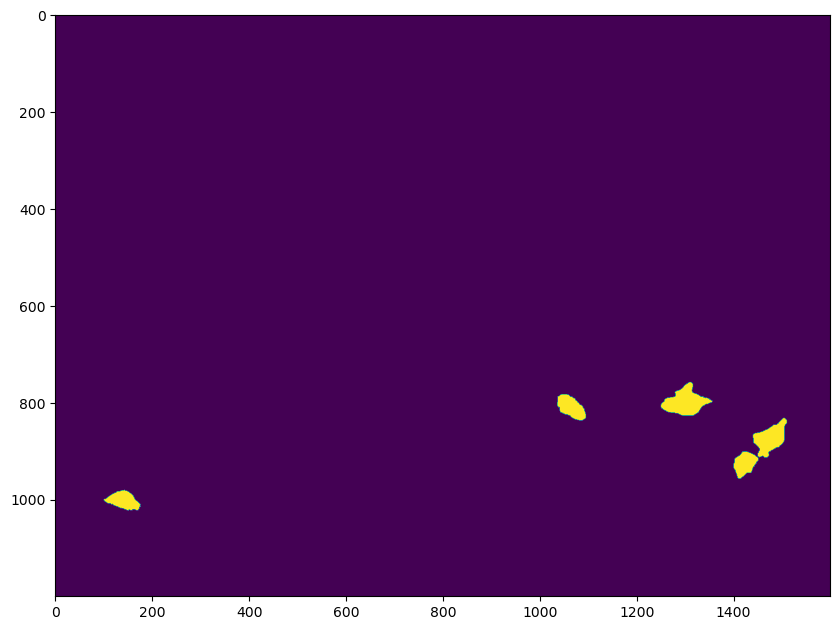

In [37]:
import matplotlib.pyplot as plt

imgListRaw = [t[0] for _, t in imgMaskPairsRaw.items()]
maskListRaw = [t[1] for _, t in imgMaskPairsRaw.items()]

#imgList = [np.array(t[0]) for _, t in imgMaskPairsRaw.items()]
#maskList = [np.array(t[1], dtype=np.uint8) for _, t in imgMaskPairsRaw.items()]

plt.figure(figsize=(10,16))
plt.imshow(maskListRaw[0])

In [38]:
from collections import namedtuple
from collections import defaultdict

CellLocation = namedtuple("CellLocation", ["nPixels", "x", "y", "width", "height"])

def bfs(r, c, nRows, nCols, traversable, groupAssignments, groupIndex):
    frontier = [(r,c)]
    groupAssignments[r][c] = groupIndex
    while len(frontier) > 0:
        curRow, curCol = frontier.pop()
        nextNodes = [
            (curRow + 1, curCol),
            (curRow - 1, curCol),
            (curRow, curCol + 1),
            (curRow, curCol - 1)
        ]
        for nextRow, nextCol in nextNodes:
            withinRange = (
                nextRow >= 0 and nextRow < nRows and
                nextCol >= 0 and nextCol < nCols)
            unvisited = (
                withinRange and 
                traversable[nextRow][nextCol] and
                groupAssignments[nextRow][nextCol] == None)
            if withinRange and unvisited:
                frontier.append((nextRow, nextCol))
                groupAssignments[nextRow][nextCol] = groupIndex
    #end of loop, all linked nodes have been marked with "groupIndex"
    return

#(imgArr:TNumeric[][]) => CellLocation[]
def markGroups(maskArr):
    threshold = int(255 * 0.5)
    #Native python list to speed up per-element indexing
    isCell = np.greater(maskArr, threshold).tolist() 
    nRows, nCols = maskArr.shape
    group = [[None]*nCols for _ in range(nRows)]
    groupIdx = 0
    #flood fill & mark cell groups
    for r in range(nRows):
        for c in range(nCols):
            unvisitedGroup = isCell[r][c] and (group[r][c] == None)
            if unvisitedGroup:
                bfs(r,c, nRows, nCols, isCell, group, groupIdx) #flood fill one cluster
                groupIdx += 1 #Ensure group clusters are unique
    
    #Get size & bounding boxes
    nGroups = groupIdx
    sizeList = [0] * nGroups
    
    rightList = [0] * nGroups
    leftList = [nCols] * nGroups

    botList = [0] * nGroups
    topList = [nRows] * nGroups
    
    for r in range(nRows):
        for c in range(nCols):
            if group[r][c] != None:
                groupNo = group[r][c]
                sizeList[groupNo] += 1
                
                rightList[groupNo] = max(rightList[groupNo], c)
                leftList[groupNo] = min(leftList[groupNo], c)
                
                botList[groupNo] = max(botList[groupNo], r)
                topList[groupNo] = min(topList[groupNo], r)
                
    #pack into tuples
    cellLocList = []
    for groupNo in range(nGroups):
        size = sizeList[groupNo]
        x = leftList[groupNo]
        y = topList[groupNo]
        width = 1 + (rightList[groupNo] - x)
        height = 1 + (botList[groupNo] - y)
        cellLocList.append(CellLocation(size, x, y, width, height))
        
    return cellLocList

In [ ]:
'''processPool = mp.Pool()
cellLocationList = processPool.map(markGroups, [np.array(t[1], dtype=np.uint8) for _, t in imgMaskPairsRaw.items()])
processPool.close()
'''

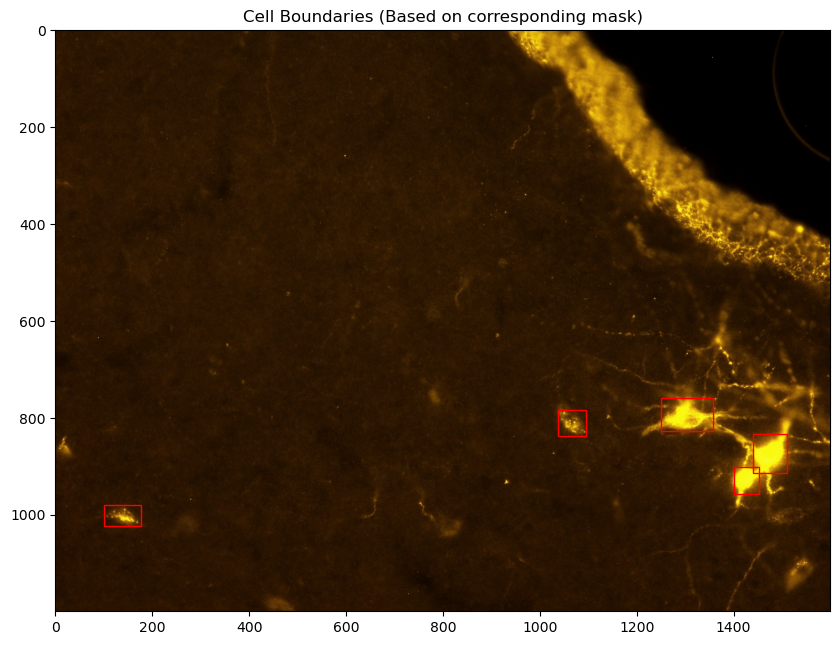

In [42]:
#Sanity check
import matplotlib.patches as patches

# Compute cell locations from all masks
cellLocationList = [markGroups(np.array(mask)) for mask in maskListRaw]

imageIdx = 0

plt.figure(figsize=(10, 16))
plt.title("Cell Boundaries (Based on corresponding mask)")
plt.imshow(imgListRaw[imageIdx])

ax = plt.gca()
for cellLoc in cellLocationList[imageIdx]:
    rect = patches.Rectangle(
        (cellLoc.x, cellLoc.y), cellLoc.width, cellLoc.height,
        linewidth=1, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)

plt.show()

In [44]:
flattenedCellLocations = []
for li in cellLocationList:
    flattenedCellLocations.extend(li)

In [46]:
nTotalCells = len(flattenedCellLocations)
print(nTotalCells)
sizes = [cellLoc.nPixels for cellLoc in flattenedCellLocations]
widths = [cellLoc.width for cellLoc in flattenedCellLocations]
heights = [cellLoc.height for cellLoc in flattenedCellLocations]

2270


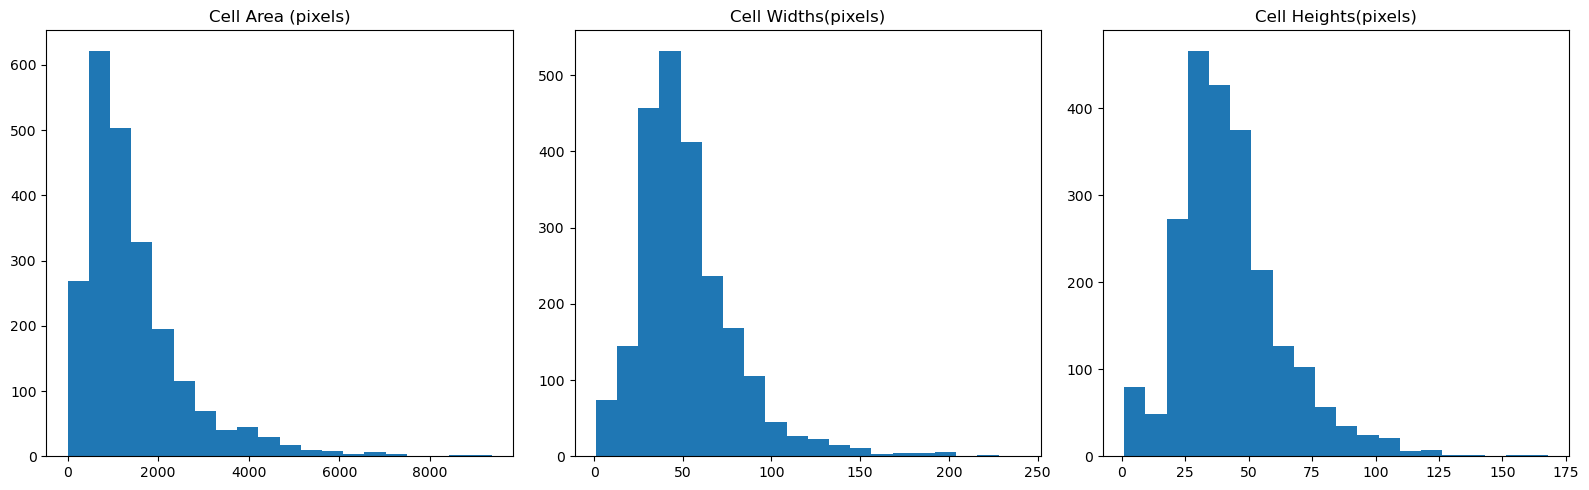

95th Percentile Values for:
 Area:3872.65 pixels
 Width:103.00 pixels
 Height:82.55 pixels


In [48]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

nBins = 20
ax[0].hist(sizes,bins=nBins)
ax[0].set_title('Cell Area (pixels)')

ax[1].hist(widths,bins=nBins)
ax[1].set_title('Cell Widths(pixels)')

ax[2].hist(heights,bins=nBins)
ax[2].set_title('Cell Heights(pixels)')

plt.tight_layout()
plt.show()

percentile = 95

sizePercentile = np.percentile(sizes, percentile)
widthPercentile = np.percentile(widths, percentile)
heightPercentile = np.percentile(heights, percentile)

print("{0}th Percentile Values for:".format(percentile))
print(" Area:{:0.2f} pixels".format(sizePercentile))
print(" Width:{:0.2f} pixels".format(widthPercentile))
print(" Height:{:0.2f} pixels".format(heightPercentile))

In [50]:
totalNoOfMarkedPixels = sum(sizes)
overallNoOfPixels = sum((mask.size[0] * mask.size[1] for mask in maskListRaw))
totalNoOfUnmarkedPixels = overallNoOfPixels - totalNoOfMarkedPixels

markedInv = overallNoOfPixels / totalNoOfMarkedPixels
unmarkedInv = overallNoOfPixels / totalNoOfUnmarkedPixels
normalizationCoeff = 1 / (markedInv + unmarkedInv)
classWeights = {
    0: unmarkedInv * normalizationCoeff, #unmarked pixels
    1: markedInv * normalizationCoeff    #marked as cells
}

print("Percentage of pixels which are neural cells: {0}%".format((totalNoOfMarkedPixels/ overallNoOfPixels) * 100))
print(classWeights)

Percentage of pixels which are neural cells: 0.6066018845700825%
{0: 0.006066018845700824, 1: 0.9939339811542991}


# Subdivision of source images

The subdivision of each 1600x1200px source image into 400x400px sub-image yields 25 sub-images. Subdivision is done in advance to reduce the computational load in the data generation pipeline, as well as to simplify the train/test dataset split.

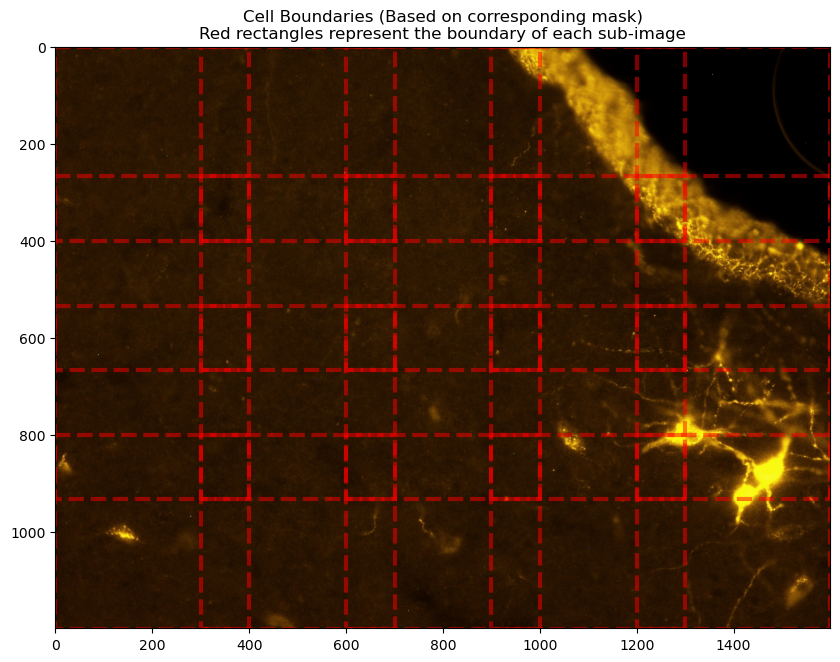

In [53]:
import math

Rect = namedtuple("Rect", ["x", "y", "width" , "height"])

def EvenlySpacedPartitions(width, height, partitionLength, minOverlap):
    def minPartitions(dimLength):
        return math.ceil((dimLength - minOverlap) / (partitionLength - minOverlap))
    nRows = minPartitions(height)
    nCols = minPartitions(width)
    
    def getPartitionStartingPositions(dimLength, nPartitions):
        overlap = (dimLength - nPartitions * partitionLength) / (1- nPartitions)
        advance = partitionLength - overlap
        return [advance * i for i in range(nPartitions)]
    
    rowPositions = getPartitionStartingPositions(height, nRows)
    colPositions = getPartitionStartingPositions(width, nCols)
    partitions = []
    for colStart in colPositions: #x
        for rowStart in rowPositions: #y
            partitions.append(Rect(colStart, rowStart, partitionLength, partitionLength))
    return partitions

imageIdx = 0;

plt.figure(figsize=(10,16))

plt.title("Cell Boundaries (Based on corresponding mask)\nRed rectangles represent the boundary of each sub-image")
plt.imshow(imgListRaw[imageIdx])

width, height  = imgListRaw[imageIdx].size

partitions = EvenlySpacedPartitions(width, height, 400, 100)

ax = plt.gca();
for partition in partitions:
    rect = patches.Rectangle((partition.x, partition.y), partition.width, partition.height, linewidth=3, edgecolor='r', alpha= 0.5, linestyle="--", facecolor='none')
    ax.add_patch(rect)

plt.show()

In [55]:
CroppedImage = namedtuple("CroppedImage", ["image", "mask", "sourceRect"])

def CropImage(pilImage, pilMask, partitions):
    croppedImages = []
    for partition in partitions:
        top, bot = (partition.y, partition.y + partition.height)
        left, right = (partition.x, partition.x + partition.width)
        croppedImg = pilImage.crop((left, top, right, bot))
        croppedMask = pilMask.crop((left, top, right, bot))
        croppedImages.append(CroppedImage(croppedImg, croppedMask, partition))
    return croppedImages

def GetAllPartitions(pilImageList, partitionSize, minOverlap):
    partitionList = []
    for img in pilImageList:
        width, height = img.size
        partitions = EvenlySpacedPartitions(width, height, partitionSize, minOverlap)
        partitionList.append(partitions)
    return partitionList

partitionList = GetAllPartitions(imgListRaw, 400, 100)

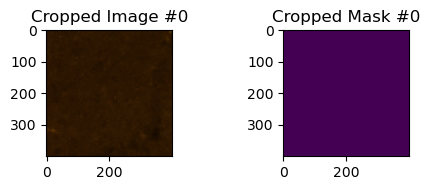

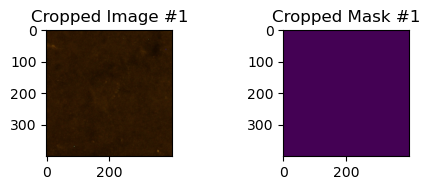

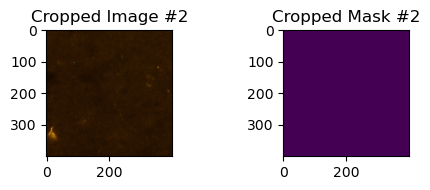

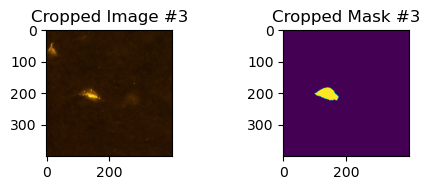

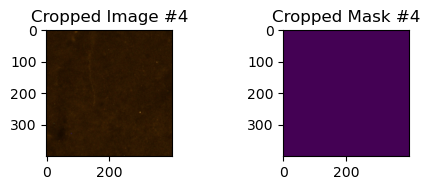

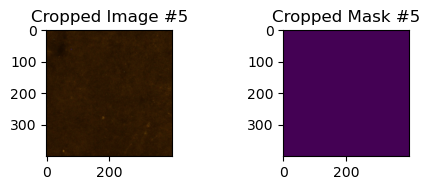

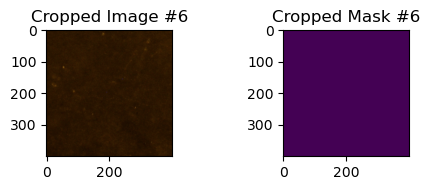

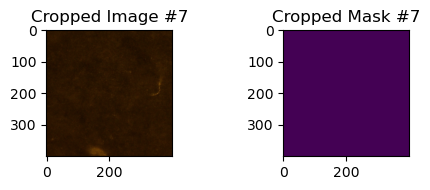

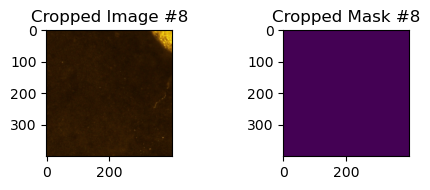

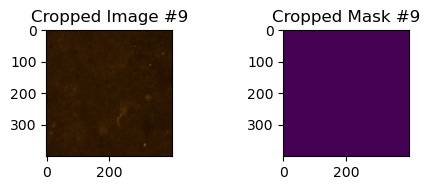

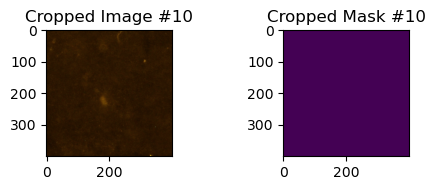

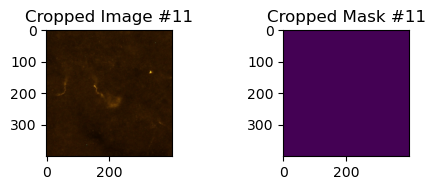

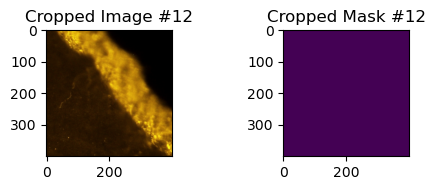

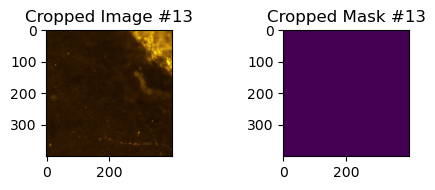

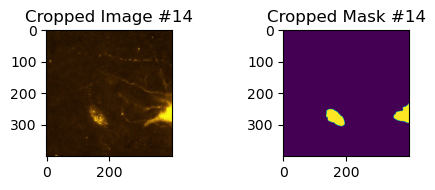

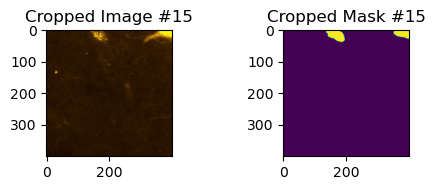

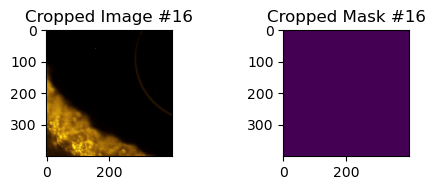

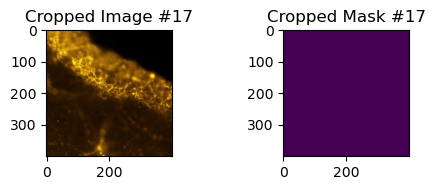

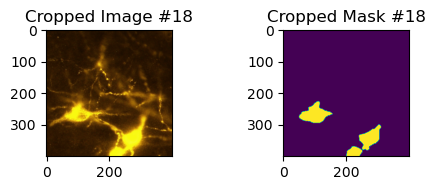

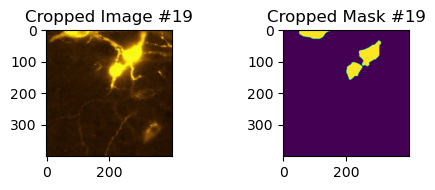

In [57]:
sampleCrop = CropImage(imgListRaw[0], maskListRaw[0], partitionList[0])

for idx, croppedImagePair in enumerate(sampleCrop):
    fig, ax = plt.subplots(1, 2, figsize=(5,2))

    ax[0].imshow(croppedImagePair.image)
    ax[0].set_title('Cropped Image #{0}'.format(idx))
    
    ax[1].imshow(croppedImagePair.mask)
    ax[1].set_title('Cropped Mask #{0}'.format(idx))
    
    plt.tight_layout()
    plt.show()

# Data Augmentation (Random Shapes)

Using the size distribution of the cells found earlier, ellipses and rounded rectangles (with colours similar to the marked neurons) are randomly drawn on each sub-image without affecting the mask.
These artificially generated shape hint to the neural network the importance of geometry as a feature for prediction.

**Remarks**: While a more rigourous approach to generating similar colours would be to fit the colours of the pixels marked as neurons to a Gaussian Distribution, or even a Gaussian Mixture Distribution, I have instead opted to generate RGB values between 2 colours very scientifically selected via the process of Guesstimation<b><sup>TM</sup></b> from the first image. To further emphasize the importance of geometry over colour, black & white images could instead be fed to the neural network.

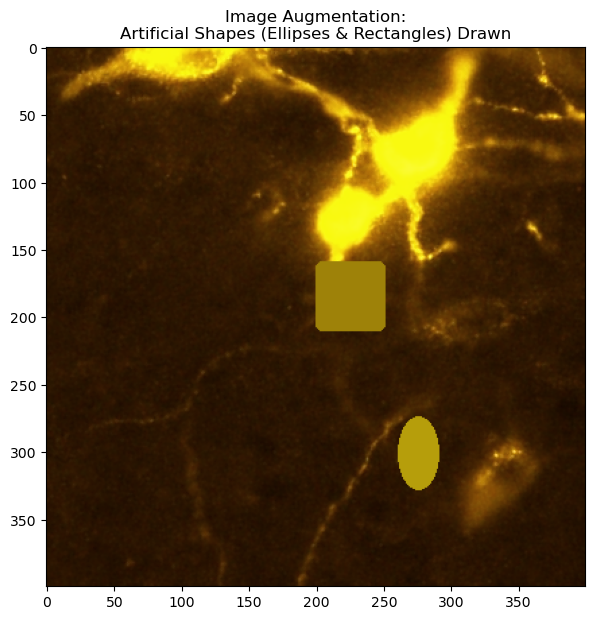

In [60]:
from PIL import ImageDraw
from enum import Enum
import random

TColour = namedtuple("TColour", ["r", "g", "b"])

#Sampled from the cells in the first image
darkYellow = TColour(101, 61, 6)
brightYellow = TColour(247, 237, 15)

#linear lerp between the rgb values
#frac = fraction of colour 2
def lerpColours(colour1, colour2, frac):
    r = colour1.r * (1 - frac) + colour2.r * frac
    g = colour1.g * (1 - frac) + colour2.g * frac
    b = colour1.b * (1 - frac) + colour2.b * frac
    return TColour(int(r),int(g),int(b))

class ENShape(Enum):
    Ellipse = 0
    Rect = 1

def DrawRandomEllipse(img, shape = ENShape.Ellipse):
    imgWidth, imgHeight = img.size
    centreX, centreY = (random.uniform(0, imgWidth), random.uniform(0, imgHeight))
    shapeWidth, shapeHeight = (random.uniform(25, 75), random.uniform(25, 75)) #based on the cell size distribution
    boundingBox = (
        int(centreX - shapeWidth * 0.5),
        int(centreY - shapeHeight * 0.5),
        int(centreX + shapeWidth * 0.5), 
        int(centreY + shapeHeight * 0.5)
    )
    
    fillColour = lerpColours(darkYellow, brightYellow, random.uniform(0, 1))
    
    gc = ImageDraw.Draw(img)
    if shape == ENShape.Ellipse:
        gc.ellipse(boundingBox, fill=fillColour, outline=None, width=1)
    elif shape == ENShape.Rect:
        rad = int(random.uniform(1, min(shapeWidth, shapeHeight) * 0.3))
        gc.rounded_rectangle(boundingBox, radius=rad, fill=fillColour, outline=None, width=1)

sampleImage = sampleCrop[-1].image.copy()
DrawRandomEllipse(sampleImage, ENShape.Ellipse)
DrawRandomEllipse(sampleImage, ENShape.Rect)

plt.figure(figsize=(7,7))
plt.title("Image Augmentation:\nArtificial Shapes (Ellipses & Rectangles) Drawn")
plt.imshow(sampleImage)

# Data Augmentation (Affine Transformations)

Affine transformations are a convenient way to apply basic transformations to an image, such as:
   * X/Y Translations (shifting the image up/down)
   * X/Y Scaling (stretching/shrinking the image in either axis)
   * Rotation about an abitrary point (Needs to be combined with translations to control the pivot)
   * X/Y Skewing - Essentially "slanting" the image into a trapezoidal shape
   * X/Y Flips (essentially just -ve X & Y scaling values)
   
A single 3x3 matrix can encapsulate all these operations (inclusive of their order). Generating these sequence of operations is done by matrix multiplying a matrix with the Affine Transformation matrix for a particular operation (i.e. rotation/scaling). This is repeated to chain the operations together. Depending on whether row major or column major order representation is used, the order of multiplications may need to be reversed to get the proper sequence.

These augmentations are applied to both the Image and Mask, to ensure they remain aligned with each other.

An examples of how to use PIL to perform Affine Transformations is given below (although tensorflow's affine transform was ultimately used in the final pipeline).

**Remarks:** Tensorflow's affine transformation, while simpler to use, has certain limitations (i.e. pivot of rotation is fixed to the centre and cannot be controlled). Additionally, Tensorflow's "fill" strategy for regions left blank by a transformation can only be used to specify a monochrome color. Moreover, it should also be noted that if your data pipeline requires a PIL image to numpy array conversion, Tensorflow's affine transformation offers no significant performance boost (both PIL & TF unfortunately run this on the CPU).

In [63]:
#Affine transformations
def TranslateXForm(x,y):
    return np.array(
        [[1,0,x],
         [0,1,y],
         [0,0,1]]
    );
        
def RotateXForm(deg):
    rad = math.radians(deg)
    return np.array(
        [[math.cos(rad),-math.sin(rad),0],
         [math.sin(rad), math.cos(rad),0],
         [0,0,1]]
    );

def ShearXForm(cx, cy):
    return np.array(
        [[1,cx,0],
         [cy,1,0],
         [0,0,1]]
    );

def ScaleXForm(xScale, yScale):
    return np.array(
        [[xScale,0,0],
         [0,yScale,0],
         [0,0,1]]
    );

def GetRandomImageXForm(imgWidth, imgHeight):
    xform = np.identity(3)
    xform = np.matmul(TranslateXForm(imgWidth * -0.5, imgHeight * -0.5), xform) # Set image centre as origin
    #Now go bananas
    #shear
    xform = np.matmul(ShearXForm(random.uniform(0, 0.20), random.uniform(0, 0.20)), xform)
    #rotation
    xform = np.matmul(RotateXForm(random.uniform(0, 360)), xform)
    #scaling
    xform = np.matmul(xform, ScaleXForm(random.uniform(0.8, 1.5), random.uniform(0.8, 1.5)))
    #horizontal/vertical flips
    yFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
    xFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
    xform = np.matmul(ScaleXForm(xFlipCoeff, yFlipCoeff), xform)
    
    xform = np.matmul(TranslateXForm(imgWidth * 0.5, imgHeight * 0.5), xform) #Shift back to 0,0 as top left origin
    return xform

imgBgColour1 = TColour(20, 8, 0)
imgBgColour2 = TColour(49, 25, 1)

def ApplyAffineXForm(image, xform, bgColour):
    invXForm = np.linalg.inv(xform) #required by PIL
    unpackedXForm = (*invXForm[0],*invXForm[1])
    
    xformedImg = image.transform(
        image.size, 
        Image.AFFINE, 
        data=unpackedXForm, 
        resample=Image.BILINEAR,
        fillcolor=bgColour)
    return xformedImg

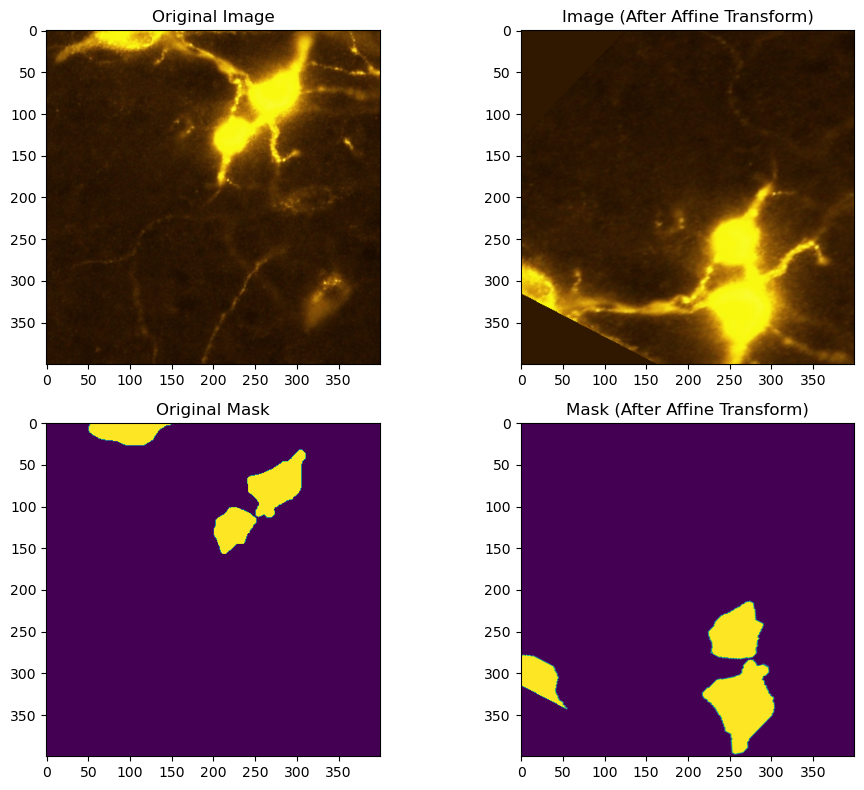

In [65]:
sampleImage = sampleCrop[-1].image
sampleMask = sampleCrop[-1].mask

augmentingXForm = GetRandomImageXForm(*sampleImage.size)
bgColour = lerpColours(imgBgColour1, imgBgColour2, random.uniform(0, 1))

xformedImg = ApplyAffineXForm(sampleImage,augmentingXForm, bgColour)
xformedMask = ApplyAffineXForm(sampleMask,augmentingXForm, 0)

fig, ax = plt.subplots(2, 2, figsize=(10,8))

ax[0,0].imshow(sampleImage)
ax[0,0].set_title('Original Image')

ax[0,1].imshow(xformedImg)
ax[0,1].set_title('Image (After Affine Transform)')

ax[1,0].imshow(sampleMask)
ax[1,0].set_title('Original Mask')

ax[1,1].imshow(xformedMask)
ax[1,1].set_title('Mask (After Affine Transform)')

plt.tight_layout()
plt.show()

In [67]:
partitionedImagesSet = [CropImage(img, mask, partitionInfo) for img, mask, partitionInfo in zip(imgListRaw, maskListRaw, partitionList)]

In [69]:
flattenedImages = []
flattenedMasks = []
for imageMaskPairList in partitionedImagesSet:
    for imageMaskPair in imageMaskPairList:
        flattenedImages.append(imageMaskPair.image)
        flattenedMasks.append(imageMaskPair.mask)

In [71]:
print(len(flattenedImages))

5660


# Data Pipeline

A Sequence based data generator is used in this case, since the augmentation strategies are capable of producing a multitude of variations. The training set is reshuffled after every epoch. By default, augmentations are turned off, and can be individually enabled via the *enableFeatures()* member function.

In [74]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import apply_affine_transform

subImgSize = 400
finalMaskSize = 50


#Note: Will draw directly on the image, pass a copy if the intent isn't to alter the original
def drawRandomShape(pilImage):
    nEllipses = random.randint(0, 2)
    for _ in range(nEllipses):
        DrawRandomEllipse(pilImage, ENShape.Ellipse)
    nRects = random.randint(0, 2)        
    for _ in range(nRects):
        DrawRandomEllipse(pilImage, ENShape.Rect)
    return pilImage

class ImageSequence(Sequence):

    def __init__(self, x_set, y_set, batch_size, mask_final_dim): 
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.shuffleIndices()
        self.mask_dim = (mask_final_dim, mask_final_dim) #Used to downscale the mask
        self.bDrawShapes = False
        self.bAffineTransform = False
    
    def shuffleIndices(self):
        nSamples = len(self.x)
        indices = np.arange(nSamples)
        np.random.shuffle(indices)
        self.indices = indices
    
    def on_epoch_end(self):
        self.shuffleIndices()
        
    def enableFeatures(self, bDrawShapes, bAffineTransform):
        self.bDrawShapes = bDrawShapes
        self.bAffineTransform = bAffineTransform
        
    def __len__(self):
        return math.floor(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        startingIdx = idx * self.batch_size
        endingIdx = (idx + 1) * self.batch_size
        selectedIndices = self.indices[startingIdx:endingIdx]
        
        splitImages = [self.x[idx] for idx in selectedIndices]
        splitMasks = [self.y[idx] for idx in selectedIndices]
        
        imgWithRandomShapes = [drawRandomShape(img.copy()) if self.bDrawShapes else img 
                                   for img in splitImages]
        masksDownscaled = [tMask.resize(self.mask_dim, Image.NEAREST ) for tMask in splitMasks]
        
        x_np = [np.array(img) for img in imgWithRandomShapes]
        y_np = [np.array(img) for img in masksDownscaled]
        
        x_augmented = []
        y_augmented = []
        
        for x, y in zip(x_np, y_np):
            rotation = random.uniform(0, 360)
            shear = random.uniform(-10, 10)
            yFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
            xFlipCoeff = 1 if bool(random.getrandbits(1)) else -1
            xScale = random.uniform(0.8, 1.5) * xFlipCoeff
            yScale = random.uniform(0.8, 1.5) * yFlipCoeff
            
            bgColor = random.uniform(0,50) #can't specify separate values for RGB
            #x_aug = apply_affine_transform(x, theta=rotation, shear=shear, zx=xScale, zy=yScale, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=bgColor, order=1)
            x_aug = None
            if self.bAffineTransform:
                x_aug = apply_affine_transform(x, theta=rotation, shear=shear, zx=xScale, zy=yScale, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=bgColor, order=1)
            else:
                x_aug = x
                
            original_y_shape = y.shape
            y_reshaped = np.reshape(y, (*original_y_shape, 1))
            y_aug = None
            if self.bAffineTransform:
                y_aug = apply_affine_transform(y_reshaped, theta=rotation, shear=shear, zx=xScale, zy=yScale, row_axis=0, col_axis=1, channel_axis=2, fill_mode='constant', cval=0.0, order=1)
            else:
                y_aug = y_reshaped
                
            y_aug_reshaped = np.reshape(y_aug, original_y_shape)
            x_augmented.append(x_aug)
            y_augmented.append(y_aug_reshaped)
            
        return (np.array(x_augmented), np.array(y_augmented) / 255)

In [76]:
from sklearn.model_selection import train_test_split

img_train, img_test, mask_train, mask_test = train_test_split(flattenedImages, flattenedMasks , test_size=0.2, random_state=0xDEADBEEF)

print(len(img_train), len(img_test))

4528 1132


# Training Set Filtering

To lower the class imbalance problem, the training set will first be filtered to only include sub-images that actually contain neurons. This increases the percentage of pixels which are neurons from 0.6% (entire dataset) to 2% (filtered training dataset). Filtering is done by checking which image/mask pair contains a mask that contains at least one non-zero value.

In [79]:
#Filter out those within the training set that actually have cells

trainSetWithCells = [(img, mask) for img, mask in 
                     zip(img_train, mask_train) 
                     if (np.sum(np.array(mask)) > 255 * 5)]
img_train_with_cells, mask_train_with_cells = zip(*trainSetWithCells) 

#for weight calculation
nUnmarkedPixels = sum([np.sum(np.array(mask) < 122) for mask in mask_train_with_cells])
nMarkedPixels = sum([np.sum(np.array(mask) > 122) for mask in mask_train_with_cells])

totalPixels = nMarkedPixels + nUnmarkedPixels
invMarked = totalPixels / nMarkedPixels
invUnmarked = totalPixels / nUnmarkedPixels
normalizingCoeff = 1 / (invMarked + invUnmarked)

lossWeights = [invUnmarked * normalizingCoeff, invMarked  * normalizingCoeff]

print(len(img_train_with_cells))
print("Unmarked: {0}, marked {1}".format(nUnmarkedPixels, nMarkedPixels))
print("Percentage of pixels which are neural cells (filtered training set): {0}%".format((nMarkedPixels/ totalPixels) * 100))
print(lossWeights)

1491
Unmarked: 233833043, marked 4726957
Percentage of pixels which are neural cells (filtered training set): 1.9814541415157612%
[0.019814541415157615, 0.9801854585848424]


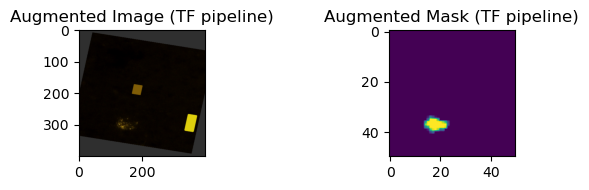

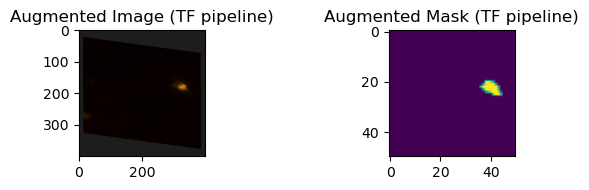

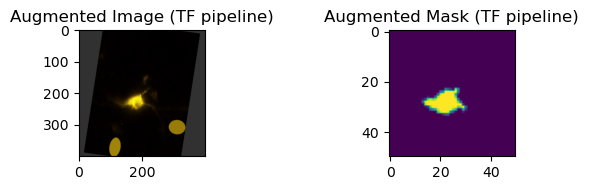

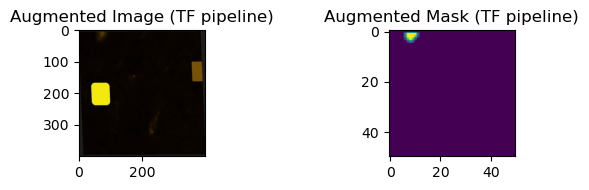

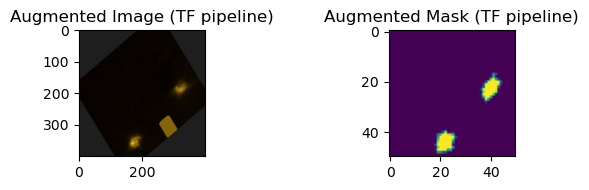

In [81]:
batch_size = 5
generator = ImageSequence(img_train_with_cells, mask_train_with_cells, batch_size, finalMaskSize)
generator.enableFeatures(True, True)
images, masks = generator.__getitem__(0)

for img, mask in zip(images, masks):
    fig, ax = plt.subplots(1, 2, figsize=(7,2))

    ax[0].imshow(img)
    ax[0].set_title('Augmented Image (TF pipeline)')
    
    ax[1].imshow(mask)
    ax[1].set_title('Augmented Mask (TF pipeline)')
    
    plt.tight_layout()
    plt.show()

# CNN implementation

Nothing fancy here, just 5 layers of convolution that progressively reduce the image size. The typical downscale-upscale architecture of most state of the art image segmentation is not adopted here since a low-resolution output mask is deemed sufficient.

Keras does not natively support class weights for 2D outputs, hence a custom loss function needs to be supplied instead.

The class weight for the neuron cell class has been scaled down by a factor of 3, this is to counteract the over-eagerness of the CNN to simply identify all yellow regions as neurons.

Due to the significant class imbalance (predicting pure black all the time gives a "accuracy" of 99.4%), the only metric that is of interest will be the Cell class' precision & recall.

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

keras.backend.clear_session()

#Loss function shamelessly copied from Sayan Dey from https://stackoverflow.com/questions/46009619/keras-weighted-binary-crossentropy
def weighted_binary_crossentropy(zero_weight, one_weight):
    def weighted_binary_crossentropy(y_true, y_pred):
        b_ce = keras.backend.binary_crossentropy(y_true, y_pred)
        # weighted calc
        weight_vector = y_true * one_weight + (1 - y_true) * zero_weight
        weighted_b_ce = weight_vector * b_ce
        return keras.backend.mean(weighted_b_ce)

    return weighted_binary_crossentropy

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(subImgSize, subImgSize, 3)),
        
        layers.Lambda(lambda x : x / 255), #{0-255} to {0-1}
        layers.Conv2D(196, 5, strides=(2,2), activation='relu'),
        layers.MaxPooling2D(2),
                
        layers.Conv2D(256, 5,  activation='relu'),
        layers.MaxPooling2D(2),
        
        layers.Conv2D(512, 3, activation='relu'),   
        layers.Conv2D(512, 1, activation='relu'),
        #layers.Conv2D(512, 2, activation='relu'),
        #layers.MaxPooling2D(2),
        
        layers.Conv2DTranspose(1,finalMaskSize - 44,activation="sigmoid")
    ]
)

opt = keras.optimizers.Adam(learning_rate=0.001)
#reduce weight of +ve class to reduce over-eagerness to evaluate all yellow blobs are cells
model.compile(optimizer=opt, loss = weighted_binary_crossentropy(lossWeights[0], lossWeights[1] * 0.33), metrics = ['acc'])
model.summary()

C:\Users\gonca\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 196)  │        14,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 196)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 95, 95, 256)    │     1,254,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 512)    │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 50, 50, 1)      │        18,433 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730,801 (10.42 MB)

 Trainable params: 2,730,801 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

# Training - \[Phase 1.1\]

5 Epochs are run on the filtered training dataset without any augmentation.
At this point, the CNN can be seen producing false-positives for any region that has even the slightest tinge of yellow.

In [87]:
#With the filtered dataset
batch_size = 50
generator = ImageSequence(img_train_with_cells, mask_train_with_cells, batch_size, finalMaskSize)

history = model.fit(
    x=generator,
    epochs=5)
    #todo validation_data=(testDataNp, testLabels))

Epoch 1/5


C:\Users\gonca\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 533s 18s/step - acc: 0.7472 - loss: 0.0136
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 607s 21s/step - acc: 0.9683 - loss: 0.0042
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 641s 22s/step - acc: 0.9684 - loss: 0.0034
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 572s 20s/step - acc: 0.9643 - loss: 0.0032
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 608s 21s/step - acc: 0.9692 - loss: 0.0029


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step


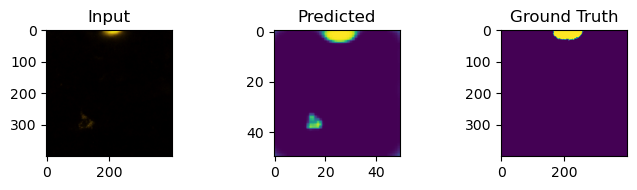

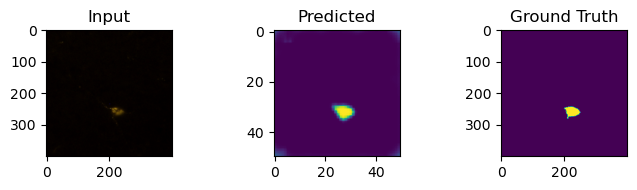

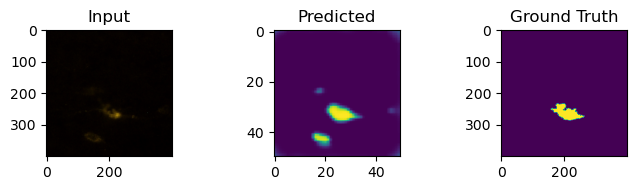

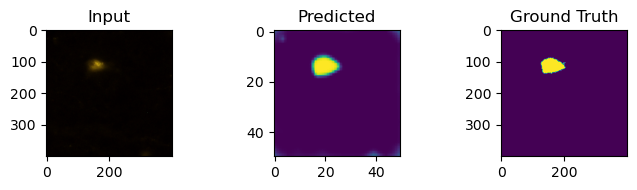

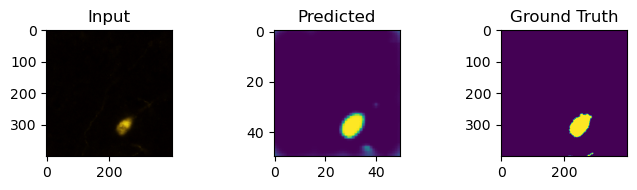

In [89]:
#Not from the validation set, just used for illustration
def previewResults():
    testCases = np.array([np.array(img) for img in img_train_with_cells[:5]])
    testGroundTruth = mask_train_with_cells[:5]
    predictions = model.predict(testCases)

    for img, pred, actual in zip(testCases, predictions, testGroundTruth):
        fig, ax = plt.subplots(1, 3, figsize=(7,2))

        ax[0].imshow(img)
        ax[0].set_title('Input')
    
        ax[1].imshow(pred)
        ax[1].set_title('Predicted')

        ax[2].imshow(actual)
        ax[2].set_title('Ground Truth')

        plt.tight_layout()
        plt.show()

previewResults()

# Training - \[Phase 1.2\]

10 Epochs are run on the filtered training dataset. Randomly drawn shapes on input images are drawn to coax the network into learning the characteristic physical contours of brain cells.
Some improvement can be seen in the resultant images
* Especially in the 5th preview image, where the contours are much sharper.
* The 3rd preview image also shows smaller false-positive regions.

In [92]:
generator.enableFeatures(True, False) #Enable Random shapes

history = model.fit(
    x=generator,
    epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 570s 20s/step - acc: 0.9461 - loss: 0.0051
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 560s 19s/step - acc: 0.9619 - loss: 0.0035
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 570s 20s/step - acc: 0.9636 - loss: 0.0034
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 588s 20s/step - acc: 0.9662 - loss: 0.0031
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 590s 20s/step - acc: 0.9636 - loss: 0.0035
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 547s 19s/step - acc: 0.9688 - loss: 0.0032
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 573s 20s/step - acc: 0.9711 - loss: 0.0030
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 522s 18s/step - acc: 0.9711 - loss: 0.0029
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 573s 20s/step - acc: 0.9697 - loss: 0.0029
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 554s 19s/step - acc: 0.9720 - loss: 0.0028


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


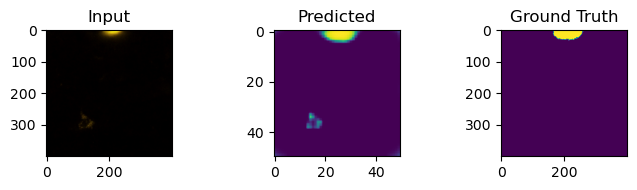

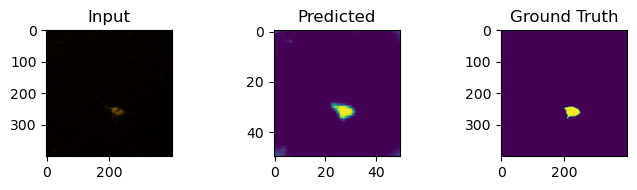

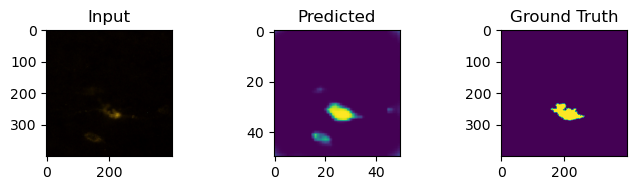

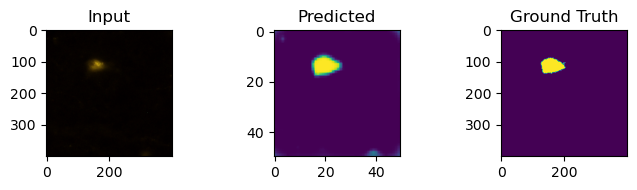

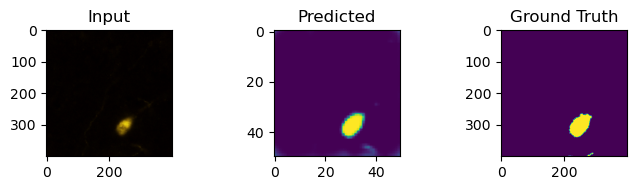

In [94]:
previewResults()

# Training - \[Phase 2\]

5 Epochs are run on the entire training dataset. All augmentations (affine transforms + random shapes) are enabled.
From the predictions, it almosts seems like this resulted in degradation in performance, with a reversion back to many false positives and very diffuse boundaries.
This could be in part due to the low number of training cycles, but nevertheless, model evaluation will proceed.

In [29]:
generator = ImageSequence(img_train, mask_train, batch_size, finalMaskSize) #use full image set
generator.enableFeatures(True, True) #Enable Random shapes + transforms

history = model.fit(
    x=generator,
    epochs=5)

Epoch 1/5
90/90 [==============================] - 115s 1s/step - loss: 0.0018 - acc: 0.9854
Epoch 2/5
90/90 [==============================] - 115s 1s/step - loss: 0.0014 - acc: 0.9876
Epoch 3/5
90/90 [==============================] - 114s 1s/step - loss: 0.0013 - acc: 0.9880
Epoch 4/5
90/90 [==============================] - 114s 1s/step - loss: 0.0013 - acc: 0.9878
Epoch 5/5
90/90 [==============================] - 114s 1s/step - loss: 0.0013 - acc: 0.9880


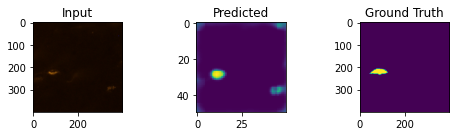

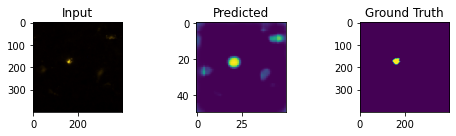

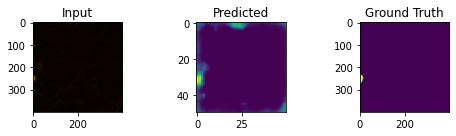

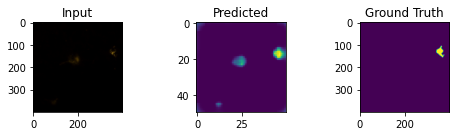

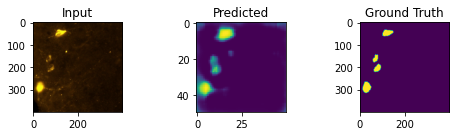

In [30]:
previewResults()

# Model Evaluation

All sub-images in the test set are fed through the model for prediction. These results are then fed through a threshold filter of 0.5 to force the predicted values to 0 or 1 for comparison. Subsequently, results are flattened and concatenated into a 1-D array of predictions in order to be evaluated using Scipy's classification reports.

In [97]:
#img_test, mask_test
predictions = model.predict(np.array([np.array(img) for img in img_test]))

36/36 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step


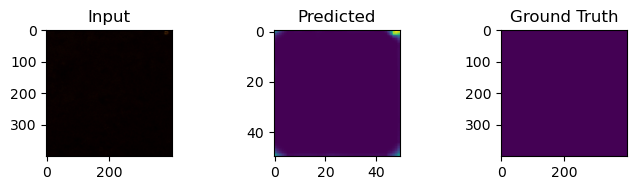

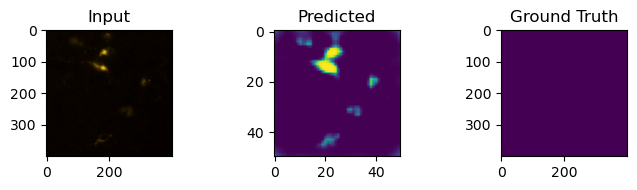

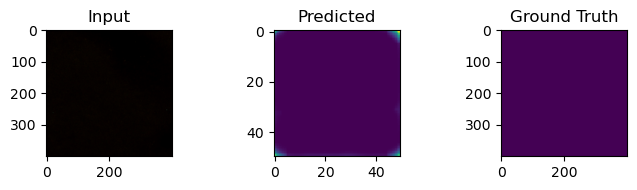

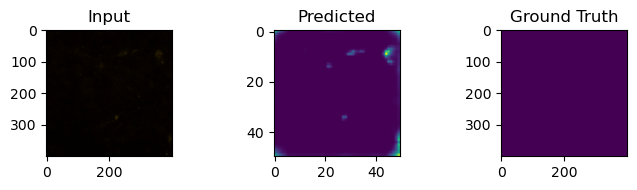

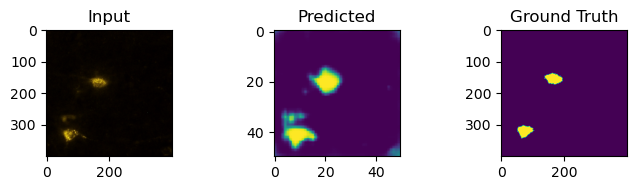

In [99]:
import itertools

for img, pred, actual in itertools.islice(zip(img_test, predictions, mask_test), 5):
    fig, ax = plt.subplots(1, 3, figsize=(7,2))
    ax[0].imshow(img)
    ax[0].set_title('Input')

    ax[1].imshow(pred)
    ax[1].set_title('Predicted')
    ax[2].imshow(actual)
    ax[2].set_title('Ground Truth')
    plt.tight_layout()
    plt.show()

In [101]:
def computeMetrics(pred, groundTruthImages):
    actualList = []
    predList = []
    for p, groundTruth in zip(pred, groundTruthImages):
        resized = groundTruth.resize((finalMaskSize,finalMaskSize), Image.BILINEAR)
        resizedThreshold = np.array(resized, dtype=np.uint8) > 122 #0-255
        predThreshold = (p > 0.5).astype(np.uint8) #0-1
        actualList.append(np.reshape(resizedThreshold, -1))
        predList.append(np.reshape(predThreshold, -1))
    actual = np.concatenate((actualList), axis=0)
    predictions = np.concatenate((predList), axis=0)
    return (predictions, actual)

pred1D, actual1D = computeMetrics(predictions, mask_test)

              precision    recall  f1-score   support

   Non-Cells       1.00      0.99      1.00   2811582
       Cells       0.39      0.92      0.55     18418

    accuracy                           0.99   2830000
   macro avg       0.70      0.96      0.77   2830000
weighted avg       1.00      0.99      0.99   2830000



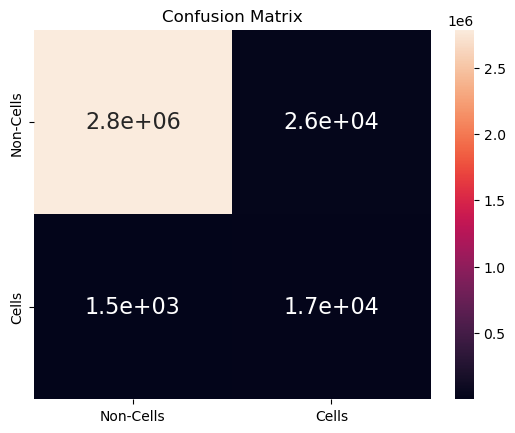

In [130]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

labels= ["Non-Cells", "Cells"]
print(classification_report(actual1D, pred1D, target_names=labels))
confusionMatrix = confusion_matrix(actual1D, pred1D)

df_cm = pd.DataFrame(confusionMatrix, index=labels, columns=labels)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}).set_title("Confusion Matrix") # font size
plt.show()

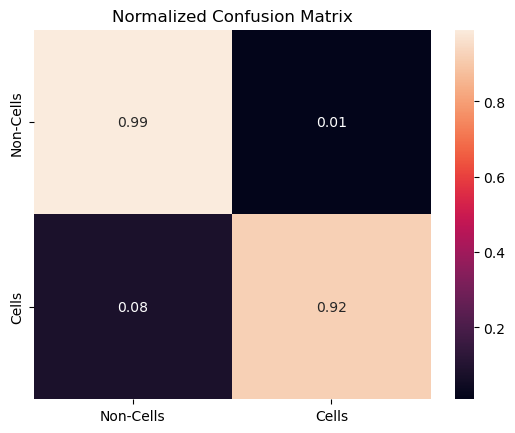

In [132]:
confMatrixNormalized = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
df_cm_norm = pd.DataFrame(confMatrixNormalized, index=labels, columns=labels)
sn.heatmap(df_cm_norm, annot=True, fmt=".2f")
plt.title("Normalized Confusion Matrix")
plt.show()

# Application of the trained model to an image

With the trained model, entire images can now be evaluated. Images are first partitioned into the required 400x400 pixel sub-images and evaluated. Each mask is then upscaled back to 400x400 and blended together into a single image. For overlapping regions, a "minimum" blend function is used to choose the lower of the two pixel values in the overlaping images. The minimum blend function helps provide a more conservative estimate about whether a pixel represents a neuron (A more prudent option given the CNN's low precision). The flood-fill algorithm can be applied to the resultant mask to perform automated counting, in addition to detecting outliers in terms of predicted area to help discard predictions that are too large/small.

One convenient benefit of using prediction based on sub-divided images is the ability for the trained network to be deployed on arbitrarily size images (as long as the pixel dimensions of the cells follow a similar distribution).

In [106]:
#Apply to an entire image
#pilImage => np.array
def applyModelToImage(pilImage, overlap=100):
    width, height = pilImage.size
    partitions = EvenlySpacedPartitions(width, height, 400, overlap)
    subImages = []#np arrays
    for partition in partitions:
        top, bot = (partition.y, partition.y + partition.height)
        left, right = (partition.x, partition.x + partition.width)
        croppedImg = pilImage.crop((left, top, right, bot))
        subImages.append(np.array(croppedImg))
    
    predictions = model.predict(np.array(subImages))
    predictionsUpscaled = []
    for pred in predictions:
        img = Image.fromarray(np.uint8(pred.reshape((50,50)) * 255))
        upscaled = np.array(img.resize((400,400)), dtype=np.uint8)
        predictionsUpscaled.append(upscaled)
    
    #Combine predictions into a single image
    #Use a "minimum" blending function, i.e. be as conservative as positive for cell predictions
    output = np.full((height, width), 255, dtype=np.uint8)
    for pred, location in zip(predictionsUpscaled, partitions):
        imgTop, imgBot = (round(location.y), round(location.y + location.height))
        imgLeft, imgRight = (round(location.x), round(location.x + location.width))
        output[imgTop:imgBot,imgLeft:imgRight] = np.minimum(output[imgTop:imgBot,imgLeft:imgRight], pred)
    
    return output

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


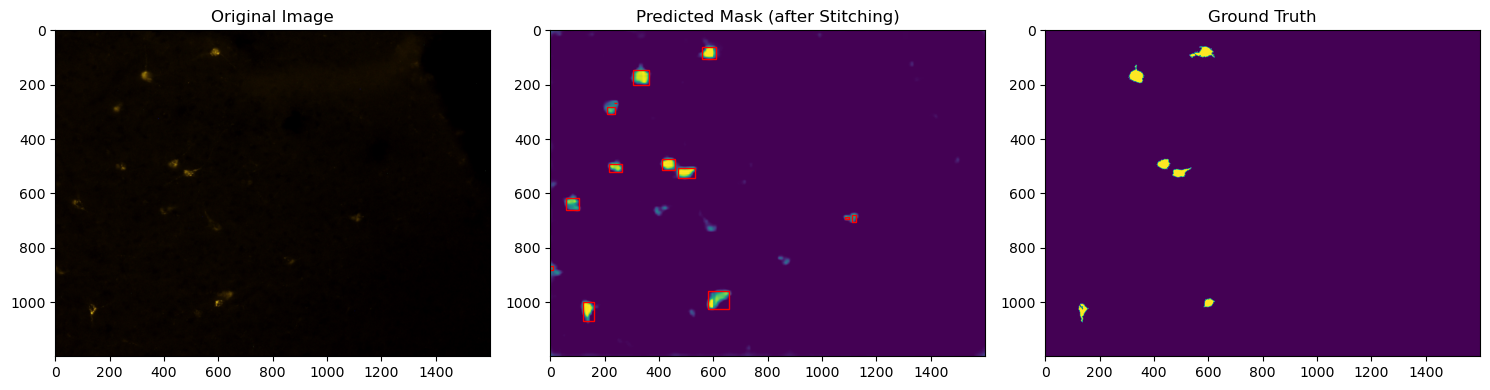

Number of cells (Intensity threshold=122): 13
 1) CellLocation(nPixels=1561, x=558, y=63, width=50, height=43)
 2) CellLocation(nPixels=2377, x=304, y=147, width=59, height=53)
 3) CellLocation(nPixels=11, x=233, y=266, width=11, height=1)
 4) CellLocation(nPixels=593, x=209, y=282, width=29, height=26)
 5) CellLocation(nPixels=1543, x=411, y=475, width=49, height=39)
 6) CellLocation(nPixels=982, x=217, y=491, width=46, height=31)
 7) CellLocation(nPixels=1807, x=468, y=508, width=64, height=36)
 8) CellLocation(nPixels=1110, x=59, y=618, width=46, height=44)
 9) CellLocation(nPixels=274, x=1109, y=679, width=16, height=27)
 10) CellLocation(nPixels=102, x=1085, y=686, width=15, height=9)
 11) CellLocation(nPixels=81, x=0, y=868, width=8, height=14)
 12) CellLocation(nPixels=2378, x=580, y=961, width=79, height=64)
 13) CellLocation(nPixels=1665, x=120, y=1000, width=39, height=69)


In [108]:
idx = 15
stitchedMask = applyModelToImage(imgListRaw[idx], 100)

predictedCellLocations = markGroups(stitchedMask) #threshold = 122

fig, ax = plt.subplots(1, 3, figsize=(15,15))

ax[0].imshow(imgListRaw[idx])
ax[0].set_title('Original Image')

ax[1].imshow(stitchedMask)
ax[1].set_title('Predicted Mask (after Stitching)')
for cellLoc in predictedCellLocations:
    rect = patches.Rectangle((cellLoc.x, cellLoc.y), cellLoc.width, cellLoc.height, linewidth=1, edgecolor='r', facecolor='none')
    ax[1].add_patch(rect)

ax[2].imshow(maskListRaw[idx])
ax[2].set_title('Ground Truth')

plt.tight_layout()
plt.show()

print("Number of cells (Intensity threshold=122): {0}".format(len(predictedCellLocations)))
for idx, loc in enumerate(predictedCellLocations):
    print(" {0}) {1}".format(idx + 1, loc))

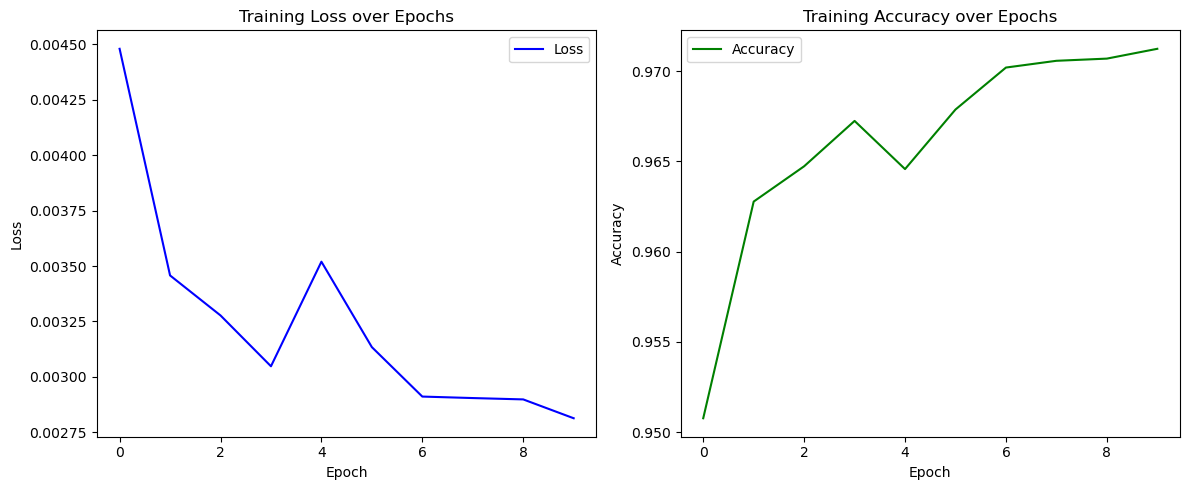

In [118]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss', color='blue')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['acc'], label='Accuracy', color='green')
    plt.title('Training Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

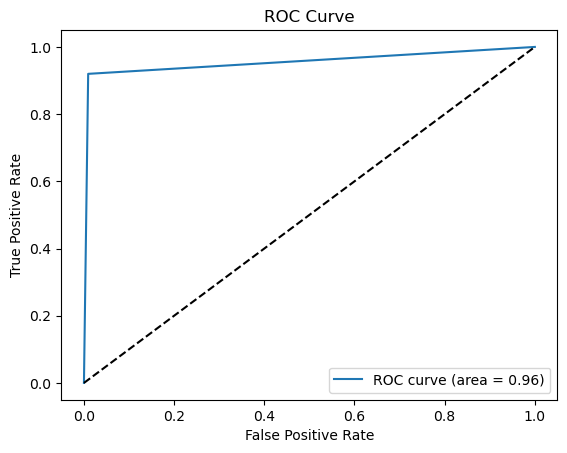

In [120]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(actual1D, pred1D)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

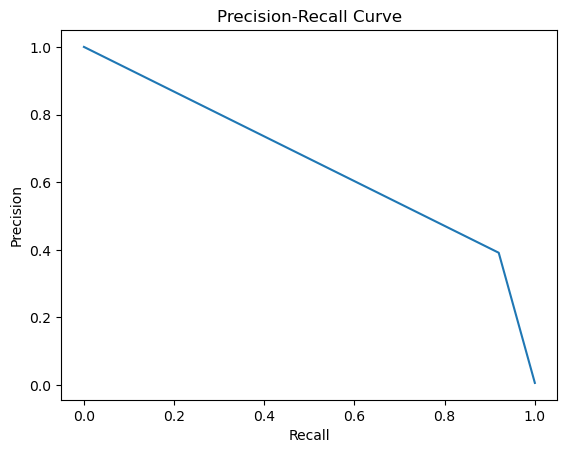

In [122]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(actual1D, pred1D)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

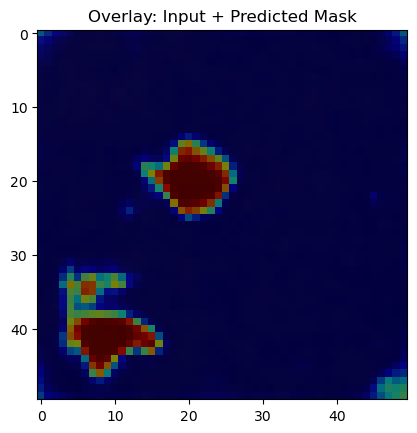

In [124]:
plt.imshow(img)
plt.imshow(pred.squeeze(), alpha=0.5, cmap='jet')
plt.title('Overlay: Input + Predicted Mask')
plt.show()

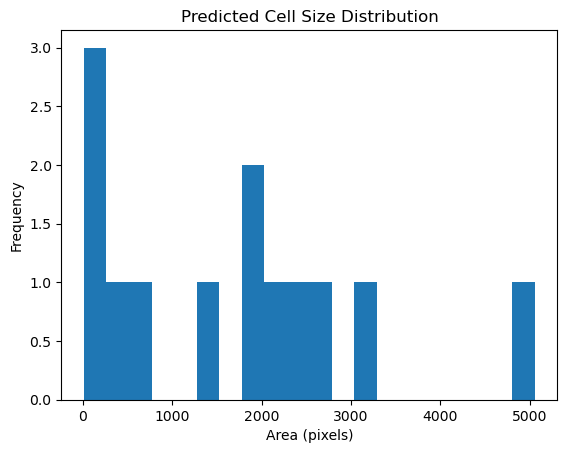

In [126]:
cell_areas = [loc.width * loc.height for loc in predictedCellLocations]
plt.hist(cell_areas, bins=20)
plt.title('Predicted Cell Size Distribution')
plt.xlabel('Area (pixels)')
plt.ylabel('Frequency')
plt.show()